## Problem Statement 
The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train_Titanic.csv')
test = pd.read_csv('Test_Titanic.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#analysing how many people survived
train.Survived.sum()/train.Survived.count()

0.3838383838383838

Barely 38% of the people survived the crash.

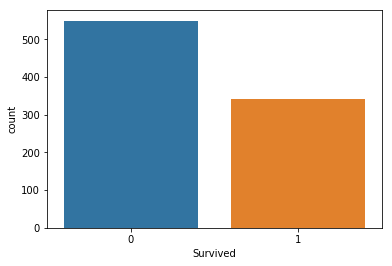

In [7]:
sns.countplot(x = 'Survived', data = train)

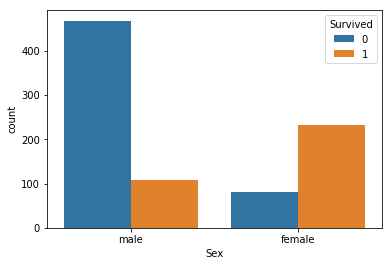

In [8]:
sns.countplot(x = 'Sex', data = train, hue = 'Survived')

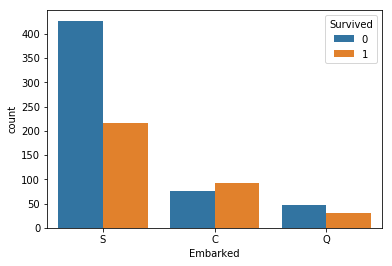

In [9]:
sns.countplot(x = 'Embarked', data = train, hue = 'Survived')

In [10]:
s = len(train.loc[(train['Survived'] == 1) & (train['Embarked'] == 'S')])/len(train.loc[(train['Embarked'] == 'S')])
c = len(train.loc[(train['Survived'] == 1) & (train['Embarked'] == 'C')])/len(train.loc[(train['Embarked'] == 'C')])
q = len(train.loc[(train['Survived'] == 1) & (train['Embarked'] == 'Q')])/len(train.loc[(train['Embarked'] == 'Q')])
print('Perc of people who started from S and survived',s*100)
print('Perc of people who started from C and survived',c*100)
print('Perc of people who started from Q and survived',q*100)

Perc of people who started from S and survived 33.69565217391305
Perc of people who started from C and survived 55.35714285714286
Perc of people who started from Q and survived 38.961038961038966


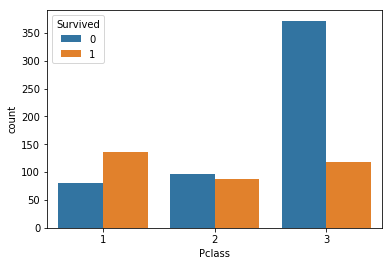

In [11]:
#analysing the number of people who survived belonging to a particular class
sns.countplot(x = 'Pclass', data = train, hue = 'Survived')

In [12]:
one = len(train.loc[(train['Survived'] == 1) & (train['Pclass'] == 1)])/len(train.loc[(train['Pclass'] == 1)])
two = len(train.loc[(train['Survived'] == 1) & (train['Pclass'] == 2)])/len(train.loc[(train['Pclass'] == 2)])
three = len(train.loc[(train['Survived'] == 1) & (train['Pclass'] == 3)])/len(train.loc[(train['Pclass'] == 3)])
print('Perc of people who belonged to class 1 and survived',one*100)
print('Perc of people who belonged to class 2 and survived',two*100)
print('Perc of people who belonged to class 3 and survived',three*100)

Perc of people who belonged to class 1 and survived 62.96296296296296
Perc of people who belonged to class 2 and survived 47.28260869565217
Perc of people who belonged to class 3 and survived 24.236252545824847


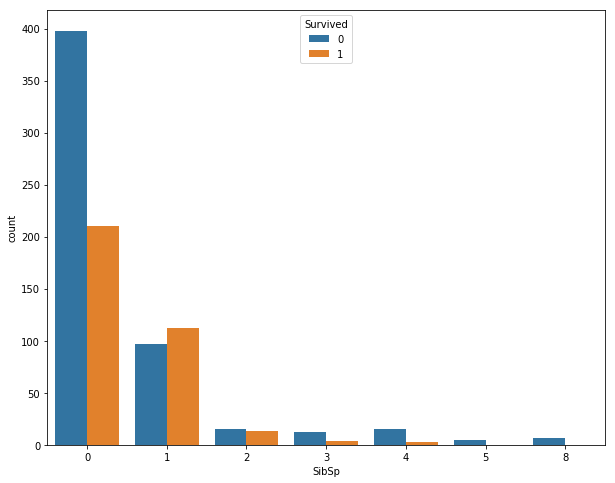

In [13]:
# analysing people who survived with varying number of sibling/spouse
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x = 'SibSp', data = train, hue = 'Survived', ax = ax)

#### Analysing with cross tabs

In [14]:
# number of people who survived belonging to a particular Pclass
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


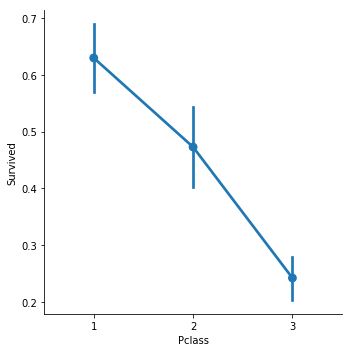

In [15]:
sns.catplot('Pclass','Survived', kind='point', data=train)

In [16]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

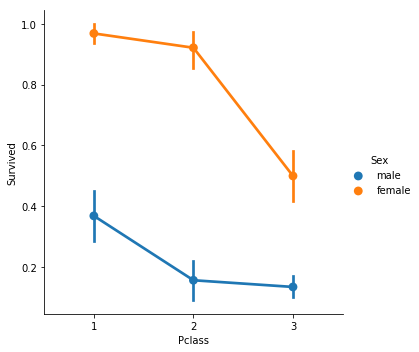

In [17]:
sns.catplot('Pclass','Survived', kind='point', data=train, hue = 'Sex')

### Null value columns

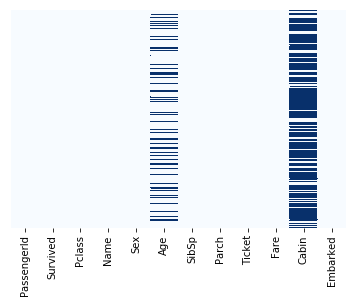

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap= 'Blues')

In [19]:
train.drop(['Cabin', 'Name', 'Ticket', 'Embarked','PassengerId'], axis = 1, inplace = True)


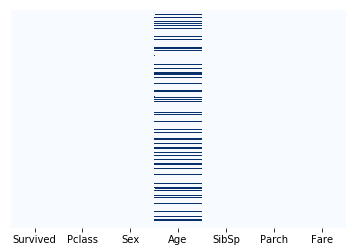

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap= 'Blues')

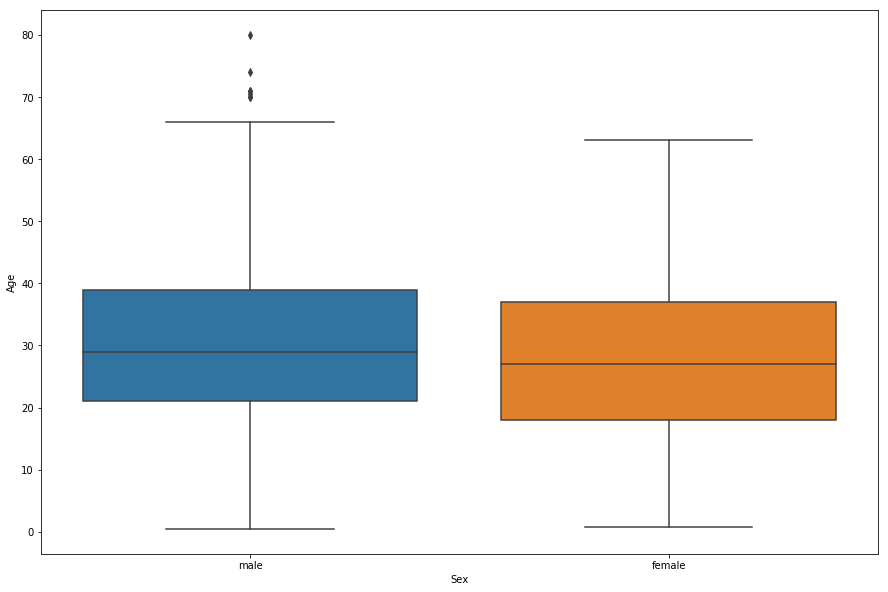

In [21]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Sex', y = 'Age', data = train)


In [22]:
#removing null values by placing in the average
def NullAge(data):
    age = data[0]
    sex = data[0]
    if pd.isnull(age):
            if sex == 'male':
                return 29
            else:
                return 25
    else:
        return age
     

In [23]:
train['Age'] = train[['Age', 'Sex']].apply(NullAge, axis = 1)

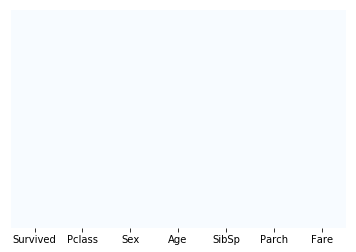

In [24]:
#all null elements removed
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap= 'Blues')

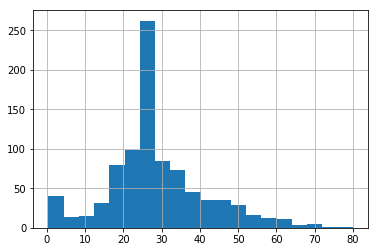

In [25]:
train.Age.hist(bins = 20)

### Dummy variable

In [26]:
male = pd.get_dummies(train['Sex'], drop_first = True)
#drop is done to avoid dummy variable trap

In [27]:
male

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [28]:
train['Sex'] = (male.male).tolist()

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [30]:
X = train.drop('Survived', axis = 1).values

In [31]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 25.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [32]:
y = train['Survived'].values

In [33]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Model Training

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model testing 

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

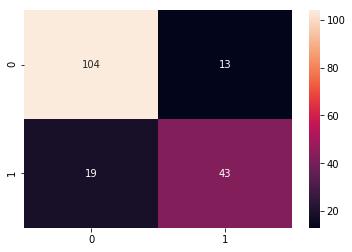

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')

104 are True Positives. 
43 are True Negatives.
13 are False Positives.
19 are False Negatives


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       117
          1       0.77      0.69      0.73        62

avg / total       0.82      0.82      0.82       179

